In [34]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
def circ_shift(a): # Function defined for circular shifting and concatenation
    X = np.array([np.roll(a,1)]).T
    a = np.array([a]).T
    V2_modified = np.concatenate((a,X),axis=1)
    return V2_modified

# Part i, ii and iii

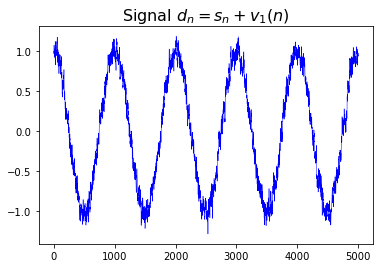

In [36]:
np.random.seed()
N = 5000
omega = 2 * 10**(-3) * np.pi
sigma = np.sqrt(0.0025)
a1 = 0.8
a2 = 0.75
noise = sigma * np.random.randn(N,1)
S = np.cos(omega * np.arange(N)).reshape(-1,1)

# Part (b)
v1 = np.zeros((N,1))
v2 = np.zeros((N,1))

for i in range(1,N):
    v1[i] = a1 * v1[i-1] + noise[i]

# Part(c)
d_n= S + v1
x_axis = np.arange(0,N,1)
plt.figure(1)
plt.plot(x_axis,d_n,'b',lw=0.5)
plt.title(r'Signal $d_n=s_n+v_1(n)$', fontsize=16)
plt.show()

# Part iv and v

In [37]:
for i in range(1,N):
    v2[i] = a2 * v2[i-1] + noise[i]
    

v2_modified = circ_shift(v2.ravel())
W = np.linalg.inv(np.dot(v2_modified.T,v2_modified)).dot(v2_modified.T).dot(d_n)
d_est = v2_modified.dot(W)
S_hat_n = d_n - d_est

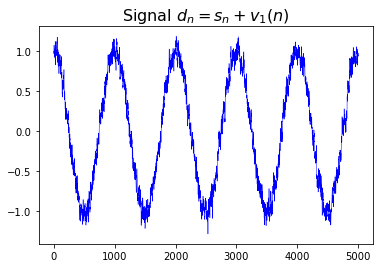

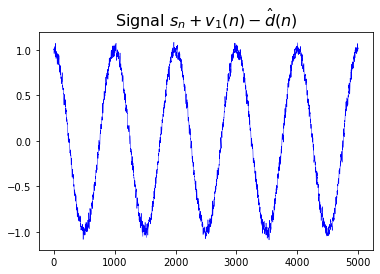

In [38]:
x_axis = np.arange(0,N,1)
plt.figure(2)
plt.plot(x_axis,d_n, 'b',lw=0.5)
plt.title(r'Signal $d_n=s_n+v_1(n)$', fontsize=16)

plt.figure(1)
plt.plot(x_axis,d_n-d_est, 'b',lw=0.5)
plt.title(r'Signal $s_n+v_1(n)-\hat d(n)$', fontsize=16)

plt.show()

# Part vi

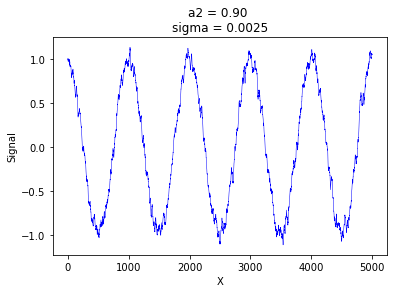

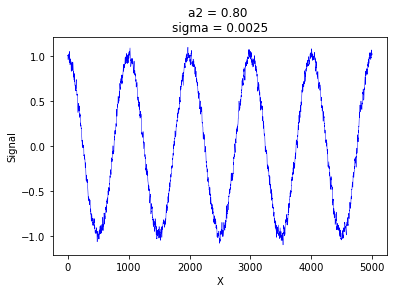

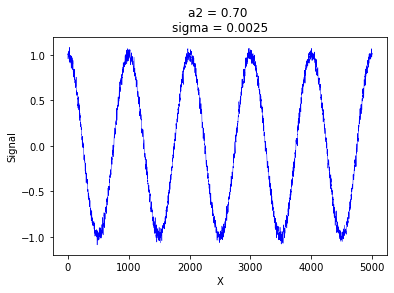

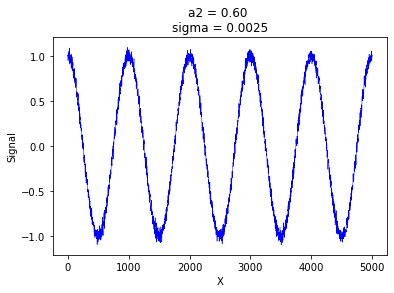

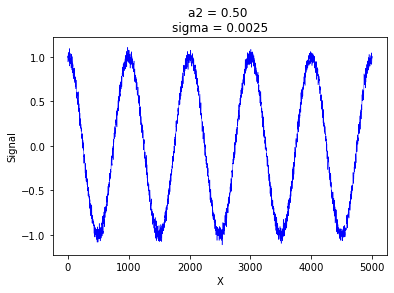

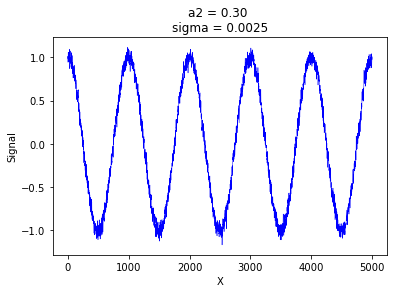

In [39]:
a2 = np.array([0.9,0.8,0.7,0.6,0.5,0.3])
for j in range (len(a2)):
    for i in range(1,N):
        v2[i] = a2[j] * v2[i-1] + noise[i]
    v2_modified = circ_shift(v2.ravel())
    W = np.linalg.inv(np.dot(v2_modified.T,v2_modified)).dot(v2_modified.T).dot(d_n)
    d_est = v2_modified.dot(W)
    S_hat_n = d_n - d_est
    x_axis = np.arange(0,N,1)
    plt.figure()
    plt.plot(x_axis,d_n-d_est, 'b',lw=0.5)
    plt.title('a2 = {:.2f} \nsigma = {:.4f}'.format(a2[j],sigma**2))
    plt.xlabel('X')
    plt.ylabel('Signal')
    plt.show()
    # Optimum value of a2 is between 0.8 and 0.7

# Part vii

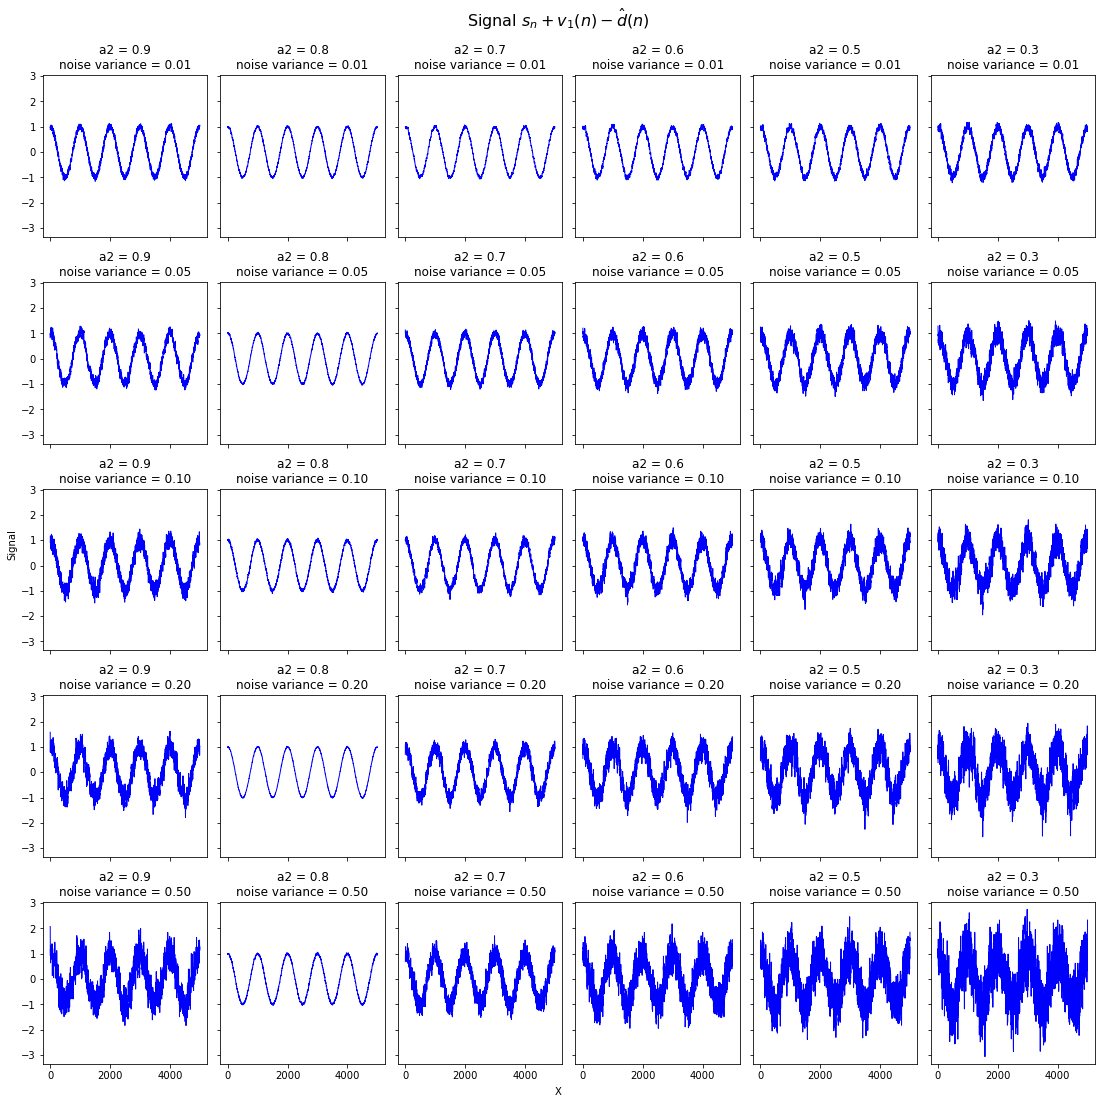

In [40]:
sigma_vec = np.sqrt(np.array([0.01,0.05,0.1,0.2,0.5]))
a2_vec = np.array([0.9,0.8,0.7,0.6,0.5,0.3])
fig, ax = plt.subplots(len(sigma_vec), len(a2_vec), sharex = True, sharey = True, figsize=(15,15), constrained_layout=True)
fig.suptitle(r'Signal $s_n+v_1(n)-\hat d(n)$', fontsize=16)
for k in range (len(sigma_vec)):
    noise = sigma_vec[k] * np.random.randn(N,1)
    for j in range (len(a2)):
        for i in range(1,N):
            v1[i] = a1 * v1[i-1] + noise[i]
            v2[i] = a2_vec[j] * v2[i-1] + noise[i]
        d_n= S + v1
        v2_modified = circ_shift(v2.ravel())
        W = np.linalg.inv(np.dot(v2_modified.T,v2_modified)).dot(v2_modified.T).dot(d_n)
        d_est = v2_modified.dot(W)
        S_hat_n = (d_n) - (d_est)
        x_axis = np.arange(0,N,1)
        ax[k,j].plot(x_axis,d_n-d_est, 'b',lw=1)
        ax[k,j].set_title("a2 = {}\nnoise variance = {:3.2f}".format(a2_vec[j],sigma_vec[k]**2))
fig.text(0.5, -0.01, 'X', ha='center')
fig.text(-0.01, 0.5, 'Signal', va='center', rotation='vertical')
plt.show()

# Comments:

***1. It can be clearly seen that optimum value of a2 is between 0.8 and 0.7, it cancels most of the noise.
If a2 is more or less than this value then V2 removes more noise than required (virtually adds more noise) or it removes less noise,
in either of these cases, the final output remains noisy***

***2. When noise variance is increased it results in noisy data even after noise cancellation.***

***3. The best case scenario is when noise variance is equal to 0.20 and a2 is 0.8.***

